In [1]:
# Siteler zararlı mı değil mi gerçek olmayan verilerle tahmin etmeye çalışacağız

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [4]:
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [6]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [8]:
dataFrame.corr()["Type"].sort_values()
# regresyondan öte sınıflandırma için çalışacağız fakat yine de korelasyona bir göz attık

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [9]:
import matplotlib.pyplot as plt
import seaborn as sbn

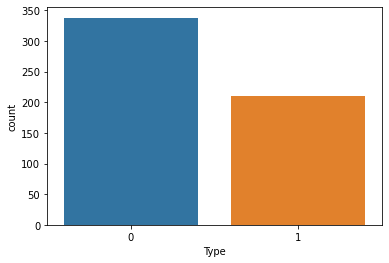

In [10]:
sbn.countplot(x = "Type", data = dataFrame)

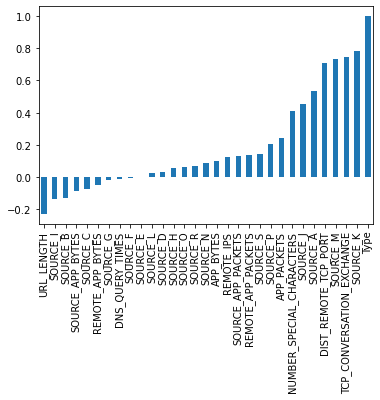

In [11]:
dataFrame.corr()["Type"].sort_values().plot(kind = "bar")

In [12]:
y = dataFrame["Type"].values
X = dataFrame.drop("Type",axis = 1).values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 15)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout 
# Dropout, rate = ne kadar rate verirsek random bir şekilde training süresince o kadar layer'ı modelimizden rastgele şekilde atmaya başlıyacak. 
from tensorflow.keras.callbacks import EarlyStopping # overfitting olmasını önlemek için

In [25]:
X_train.shape # 383 row 30 column varmış

(383, 30)

In [28]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu")) #  30 nöron koymamızın sebebi; kaç tane kolonumuz varsa giriş input layer'ımızı ona denk yapmamız önerilir.
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")


In [29]:
model.fit(x = X_train, y = y_train, epochs=700 , validation_data = (X_test,y_test), verbose = 1)
# epochs'u abartalım 

Epoch 1/700
12/12 [==============================] - 2s 34ms/step - loss: 0.6956 - val_loss: 0.6826
Epoch 2/700
12/12 [==============================] - 0s 9ms/step - loss: 0.6767 - val_loss: 0.6701
Epoch 3/700
12/12 [==============================] - 0s 9ms/step - loss: 0.6577 - val_loss: 0.6538
Epoch 4/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6392 - val_loss: 0.6296
Epoch 5/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6083 - val_loss: 0.5997
Epoch 6/700
12/12 [==============================] - 0s 9ms/step - loss: 0.5680 - val_loss: 0.5683
Epoch 7/700
12/12 [==============================] - 0s 8ms/step - loss: 0.5310 - val_loss: 0.5215
Epoch 8/700
12/12 [==============================] - 0s 8ms/step - loss: 0.4710 - val_loss: 0.4854
Epoch 9/700
12/12 [==============================] - 0s 9ms/step - loss: 0.4389 - val_loss: 0.4420
Epoch 10/700
12/12 [==============================] - 0s 9ms/step - loss: 0.3660 - val_loss: 0.4001
Epoch 11

Epoch 83/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0483 - val_loss: 0.1739
Epoch 84/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0583 - val_loss: 0.1738
Epoch 85/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0560 - val_loss: 0.1758
Epoch 86/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0614 - val_loss: 0.1726
Epoch 87/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0654 - val_loss: 0.1757
Epoch 88/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0708 - val_loss: 0.1746
Epoch 89/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0445 - val_loss: 0.1716
Epoch 90/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0431 - val_loss: 0.1784
Epoch 91/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0533 - val_loss: 0.1706
Epoch 92/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0464 - val_loss: 0.1709


12/12 [==============================] - 0s 7ms/step - loss: 0.0411 - val_loss: 0.1488
Epoch 165/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0440 - val_loss: 0.1483
Epoch 166/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0389 - val_loss: 0.1493
Epoch 167/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0449 - val_loss: 0.1485
Epoch 168/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0277 - val_loss: 0.1522
Epoch 169/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0542 - val_loss: 0.1553
Epoch 170/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0425 - val_loss: 0.1545
Epoch 171/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0409 - val_loss: 0.1518
Epoch 172/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0262 - val_loss: 0.1516
Epoch 173/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0540 - val_loss: 0.1683
Epoc

12/12 [==============================] - 0s 7ms/step - loss: 0.0173 - val_loss: 0.1793
Epoch 246/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0239 - val_loss: 0.1755
Epoch 247/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0361 - val_loss: 0.1806
Epoch 248/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0207 - val_loss: 0.1770
Epoch 249/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0215 - val_loss: 0.1776
Epoch 250/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0257 - val_loss: 0.1794
Epoch 251/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0254 - val_loss: 0.1867
Epoch 252/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0383 - val_loss: 0.1846
Epoch 253/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0235 - val_loss: 0.1843
Epoch 254/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0294 - val_loss: 0.1823
Epoc

Epoch 326/700
12/12 [==============================] - 0s 12ms/step - loss: 0.0431 - val_loss: 0.2022
Epoch 327/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0226 - val_loss: 0.2077
Epoch 328/700
12/12 [==============================] - 0s 11ms/step - loss: 0.0178 - val_loss: 0.2049
Epoch 329/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0202 - val_loss: 0.2073
Epoch 330/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0165 - val_loss: 0.2052
Epoch 331/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0345 - val_loss: 0.2119
Epoch 332/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0278 - val_loss: 0.2050
Epoch 333/700
12/12 [==============================] - 0s 11ms/step - loss: 0.0192 - val_loss: 0.2040
Epoch 334/700
12/12 [==============================] - 0s 12ms/step - loss: 0.0199 - val_loss: 0.2089
Epoch 335/700
12/12 [==============================] - 0s 14ms/step - loss: 0.0381 - va

12/12 [==============================] - 0s 8ms/step - loss: 0.0171 - val_loss: 0.2449
Epoch 407/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0250 - val_loss: 0.2420
Epoch 408/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0261 - val_loss: 0.2462
Epoch 409/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0113 - val_loss: 0.2435
Epoch 410/700
12/12 [==============================] - 0s 10ms/step - loss: 0.0229 - val_loss: 0.2432
Epoch 411/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0129 - val_loss: 0.2452
Epoch 412/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0228 - val_loss: 0.2446
Epoch 413/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0139 - val_loss: 0.2489
Epoch 414/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0207 - val_loss: 0.2475
Epoch 415/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0155 - val_loss: 0.2505
Epo

12/12 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.2785
Epoch 488/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0140 - val_loss: 0.2805
Epoch 489/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 0.2842
Epoch 490/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0209 - val_loss: 0.2815
Epoch 491/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0117 - val_loss: 0.2802
Epoch 492/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - val_loss: 0.2790
Epoch 493/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.2821
Epoch 494/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0178 - val_loss: 0.2828
Epoch 495/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.2882
Epoch 496/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0142 - val_loss: 0.2833
Epoc

12/12 [==============================] - 0s 8ms/step - loss: 0.0134 - val_loss: 0.3052
Epoch 569/700
12/12 [==============================] - 0s 10ms/step - loss: 0.0114 - val_loss: 0.3005
Epoch 570/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.3021
Epoch 571/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0070 - val_loss: 0.3116
Epoch 572/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.3013
Epoch 573/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.3036
Epoch 574/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.3071
Epoch 575/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0056 - val_loss: 0.3021
Epoch 576/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0067 - val_loss: 0.3002
Epoch 577/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.3100
Epo

12/12 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.3297
Epoch 650/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.3377
Epoch 651/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.3305
Epoch 652/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.3461
Epoch 653/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.3332
Epoch 654/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.3437
Epoch 655/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 0.3220
Epoch 656/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.3404
Epoch 657/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.3244
Epoch 658/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.4321
Epoc

In [34]:
# model.history.history

In [31]:
modelKaybi = pd.DataFrame(model.history.history)

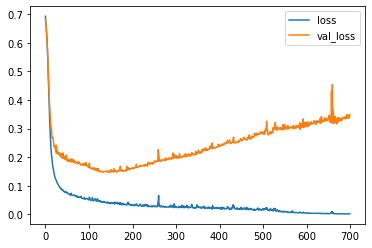

In [33]:
modelKaybi.plot() 
# modelimiz overfitting oldu.
# elimizdeki veriyi verirsek doğru ama dışardan bir veri verirsek yanlış sonuç verecektir.


In [35]:
# Early Stopping kullanalım.

model = Sequential()

model.add(Dense(units = 30, activation = "relu")) #  30 nöron koymamızın sebebi; kaç tane kolonumuz varsa giriş input layer'ımızı ona denk yapmamız önerilir.
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")


In [36]:
earlyStopping = EarlyStopping(monitor = "val_loss", mode = "min",verbose = 1,patience = 25)

In [37]:
model.fit(x = X_train, y = y_train, epochs = 700, validation_data=(X_test,y_test), verbose = 1, callbacks =[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 27ms/step - loss: 0.6890 - val_loss: 0.6840
Epoch 2/700
12/12 [==============================] - 0s 10ms/step - loss: 0.6709 - val_loss: 0.6701
Epoch 3/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6546 - val_loss: 0.6561
Epoch 4/700
12/12 [==============================] - 0s 9ms/step - loss: 0.6304 - val_loss: 0.6411
Epoch 5/700
12/12 [==============================] - 0s 8ms/step - loss: 0.5979 - val_loss: 0.6122
Epoch 6/700
12/12 [==============================] - 0s 9ms/step - loss: 0.5527 - val_loss: 0.5810
Epoch 7/700
12/12 [==============================] - 0s 9ms/step - loss: 0.5280 - val_loss: 0.5381
Epoch 8/700
12/12 [==============================] - 0s 8ms/step - loss: 0.4669 - val_loss: 0.5003
Epoch 9/700
12/12 [==============================] - 0s 9ms/step - loss: 0.4215 - val_loss: 0.4548
Epoch 10/700
12/12 [==============================] - 0s 9ms/step - loss: 0.3709 - val_loss: 0.4158
Epoch 1

Epoch 83/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0345 - val_loss: 0.2120
Epoch 84/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0409 - val_loss: 0.2254
Epoch 85/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0486 - val_loss: 0.2139
Epoch 86/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0569 - val_loss: 0.2178
Epoch 87/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0453 - val_loss: 0.2123
Epoch 88/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0354 - val_loss: 0.2137
Epoch 89/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0484 - val_loss: 0.2128
Epoch 90/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0267 - val_loss: 0.2125
Epoch 91/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0407 - val_loss: 0.2160
Epoch 92/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0450 - val_loss: 0.2108


In [38]:
modelKaybi = pd.DataFrame(model.history.history)

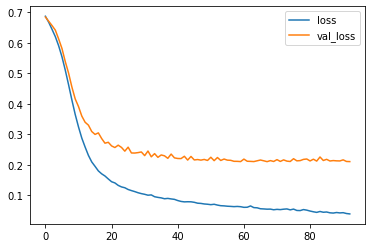

In [39]:
modelKaybi.plot()

In [41]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu")) #  30 nöron koymamızın sebebi; kaç tane kolonumuz varsa giriş input layer'ımızı ona denk yapmamız önerilir.
model.add(Dropout(0.5))

model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [42]:
model.fit(x = X_train, y = y_train, epochs = 700, validation_data=(X_test,y_test), verbose = 1, callbacks =[earlyStopping])

Epoch 1/700
12/12 [==============================] - 2s 46ms/step - loss: 0.7095 - val_loss: 0.6807
Epoch 2/700
12/12 [==============================] - 0s 10ms/step - loss: 0.7013 - val_loss: 0.6790
Epoch 3/700
12/12 [==============================] - 0s 14ms/step - loss: 0.6828 - val_loss: 0.6777
Epoch 4/700
12/12 [==============================] - 0s 12ms/step - loss: 0.6909 - val_loss: 0.6762
Epoch 5/700
12/12 [==============================] - 0s 12ms/step - loss: 0.6699 - val_loss: 0.6736
Epoch 6/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6673 - val_loss: 0.6707
Epoch 7/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6535 - val_loss: 0.6672
Epoch 8/700
12/12 [==============================] - 0s 10ms/step - loss: 0.6562 - val_loss: 0.6627
Epoch 9/700
12/12 [==============================] - 0s 14ms/step - loss: 0.6396 - val_loss: 0.6553
Epoch 10/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6445 - val_loss: 0.6471

12/12 [==============================] - 0s 10ms/step - loss: 0.1719 - val_loss: 0.2643
Epoch 83/700
12/12 [==============================] - 0s 12ms/step - loss: 0.2470 - val_loss: 0.2660
Epoch 84/700
12/12 [==============================] - 0s 11ms/step - loss: 0.1521 - val_loss: 0.2679
Epoch 85/700
12/12 [==============================] - 0s 8ms/step - loss: 0.2232 - val_loss: 0.2762
Epoch 86/700
12/12 [==============================] - 0s 11ms/step - loss: 0.2029 - val_loss: 0.2838
Epoch 87/700
12/12 [==============================] - 0s 11ms/step - loss: 0.2029 - val_loss: 0.2796
Epoch 88/700
12/12 [==============================] - 0s 8ms/step - loss: 0.1636 - val_loss: 0.2842
Epoch 89/700
12/12 [==============================] - 0s 8ms/step - loss: 0.1873 - val_loss: 0.2844
Epoch 90/700
12/12 [==============================] - 0s 11ms/step - loss: 0.2010 - val_loss: 0.2691
Epoch 91/700
12/12 [==============================] - 0s 10ms/step - loss: 0.1430 - val_loss: 0.2744
Epoch 

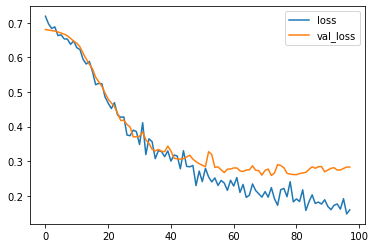

In [44]:
kayipDF = pd.DataFrame(model.history.history)
kayipDF.plot()

In [50]:
tahminlerimiz = model.predict_classes(X_test)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [51]:
tahminlerimiz

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [53]:
from sklearn.metrics import classification_report, confusion_matrix # sınıflandırmamızın ne kadar düzgün sonuçlar verdiğini değerlendirmemiz için

In [55]:
print(classification_report(y_test, tahminlerimiz))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        91
           1       0.90      0.88      0.89        74

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165



In [56]:
print(confusion_matrix(y_test, tahminlerimiz))

[[84  7]
 [ 9 65]]
